# Exercício pag! - Parte 1

Faremos a análise do banco de dados do [Brasil.IO](https://brasil.io/datasets "Brasil.IO dataset") chamado **Gasto dos deputados**.
<br />
[Download](https://drive.google.com/drive/folders/1uAtafk7V-V7ppmizfObPLDh85sGeh47t) <br />
Inicio realizando o carregamento das livrarias a serem utilizadas e da base de dados.

In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import colorsys
import datetime
from datetime import date
import matplotlib.pyplot as plt

df = pd.read_csv("cota-parlamentar.csv")

In [10]:
df["datemissao"] = pd.to_datetime(df["datemissao"], errors="coerce")
dfindex = df.set_index("datemissao", inplace=True)

Para garantir a utilização de dados corretos, irei restringir a análise entre jan/2012 e mar/2019. Período mais confiável no banco de dados, de acordo com análise prévia.

In [11]:
dfpart = df["2012-01":"2019-03"]
dfpart.head(2)

,codlegislatura,idedocumento,idecadastro,indtipodocumento,nucarteiraparlamentar,nudeputadoid,nulegislatura,numano,numespecificacaosubcota,numlote,...,txtdescricao,txtdescricaoespecificacao,txtfornecedor,txtnumero,txtpassageiro,txttrecho,vlrdocumento,vlrglosa,vlrliquido,vlrrestituicao
datemissao,,,,,,,,,,,,,,,,,,,,,
2019-01-16,55.0,6738121,NaN,4,NaN,2812,NaN,2019,0,1554246,...,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,CRISTIANE FERREIRA EPP,693,NaN,NaN,111.30,0.0,111.30,NaN
2019-01-22,55.0,6740108,NaN,4,NaN,2439,NaN,2019,0,1554921,...,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NaN,LOJAS AMERICANAS S/A,11141,NaN,NaN,149.95,0.0,149.95,NaN


Para facilitar a visualização, toda a análise será baseada nos valores R$/mil.

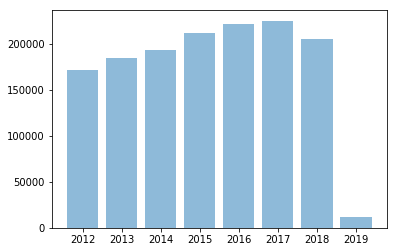

datemissao
2017    224881.91722
2018    204973.54704
2019     11332.26045
Name: vlrliquido, dtype: float64


In [350]:
resumoano = dfpart.groupby(dfpart.index.year).sum()['vlrliquido']/1000
ano = ("2012","2013","2014","2015","2016","2017","2018","2019")
y_pos2 = np.arange(len(ano))
plt.bar(ano, resumoano, align="center", alpha = .5)
plt.xticks(y_pos2, ano)
plt.show()
print(resumoano[5:])

Observando o valor por ano, tem-se uma crescente até 2017 com uma ligeira queda em 2018, talvez impactada pela mudança no governo. O pico foi em 2017, onde foram gastos aproximadamente **225 milhões de reais**.

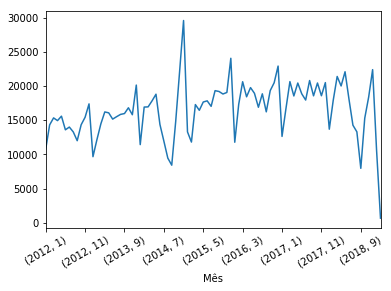

count       86.000000
mean     16546.185451
std       4093.671121
min        679.640770
25%      14335.912745
50%      16923.498730
75%      18933.790998
max      29600.799000
Name: vlrliquido, dtype: float64


In [35]:
resumomes = dfpart.groupby([dfpart.index.year, dfpart.index.month]).sum()['vlrliquido']/1000
resumomes.plot()
plt.xticks(rotation = 30)
plt.xlabel("Mês")
plt.show()
print(resumomes.describe())

Observa-se um pico excepcional no mês de dez/14. A média mensal de  gastos é de 16,5 milhões com um desvio padrão de 4 milhões.

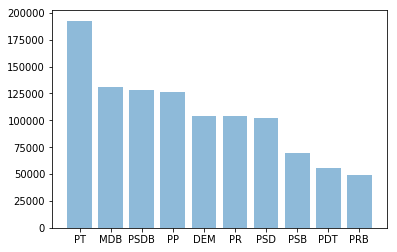

In [36]:
resumopartido = dfpart.groupby(dfpart["sgpartido"]).sum()['vlrliquido']/1000
top10_partidos = resumopartido.sort_values(ascending = False).head(10)
x = list(top10_partidos.index)
plt.bar(x,top10_partidos, alpha = .5)
plt.show()

O partido com maior gasto nesse período foi o PT (aproximadamente 200 milhões de reais), com um valor bem acima dos demais. Seguido por MDB, PSDB e PP em um mesmo patamar de gasto; depois DEM, PR e PSD com um patamar semelhante de gastos.

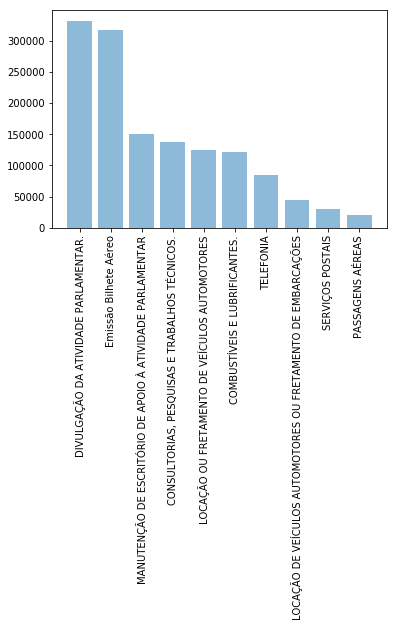

In [37]:
resumotipo = dfpart.groupby(dfpart["txtdescricao"]).sum()['vlrliquido']/1000
top10_tipos = resumotipo.sort_values(ascending = False).head(10)
x = list(top10_tipos.index)
plt.bar(x,top10_tipos, alpha = .5)
plt.xticks(rotation=90)
plt.show()

O gasto de maior valor é DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR, seguido de Emissão Bilhete Aéreo. Os dois gastos representam  aproximadamente aproximadamente 600 milhões de reais. <br />
Abaixo pode-se observar os top 15 políticos e partidos com maior gasto nessas categorias.

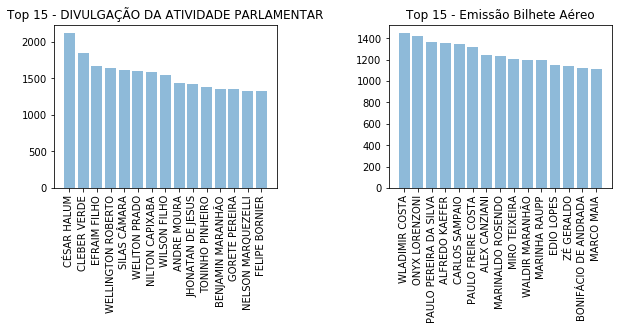

In [103]:
fig, eixos = plt.subplots(nrows=1, ncols=2,figsize=(10,3))

dfpart_divulg = dfpart.loc[dfpart['txtdescricao']=="DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR."]
resumopol_1 = dfpart_divulg.groupby(dfpart_divulg["txnomeparlamentar"]).sum()['vlrliquido']/1000
top15_pol_1 = resumopol_1.sort_values(ascending = False).head(15)
x_1 = list(top15_pol_1.index)
g1 = eixos[0].bar(x_1,top15_pol_1, alpha = .5)
eixos[0].set_title("Top 15 - DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR")
plt.xticks(rotation=90)

dfpart_aereas = dfpart.loc[dfpart['txtdescricao']=="Emissão Bilhete Aéreo"]
resumopol_2 = dfpart_aereas.groupby(dfpart_aereas["txnomeparlamentar"]).sum()['vlrliquido']/1000
top15_pol_2 = resumopol_2.sort_values(ascending = False).head(15)
x_2 = list(top15_pol_2.index)
g2 = eixos[1].bar(x_2,top15_pol_2, alpha = .5)
eixos[1].set_title("Top 15 - Emissão Bilhete Aéreo")

plt.setp(eixos[0].get_xticklabels(), rotation=90)
plt.setp(eixos[1].get_xticklabels(), rotation=90)
plt.subplots_adjust(wspace=.5)
plt.show()


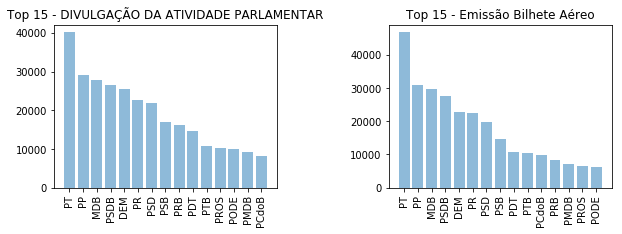

In [131]:
fig, eixos = plt.subplots(nrows=1, ncols=2,figsize=(10,3))

dfpart_divulg = dfpart.loc[dfpart['txtdescricao']=="DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR."]
resumopol_3 = dfpart_divulg.groupby(dfpart_divulg["sgpartido"]).sum()['vlrliquido']/1000
top15_pol_3 = resumopol_3.sort_values(ascending = False).head(15)
x_3 = list(top15_pol_3.index)
g3 = eixos[0].bar(x_3,top15_pol_3, alpha = .5)
eixos[0].set_title("Top 15 - DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR")
plt.xticks(rotation=90)

dfpart_aereas = dfpart.loc[dfpart['txtdescricao']=="Emissão Bilhete Aéreo"]
resumopol_4 = dfpart_aereas.groupby(dfpart_aereas["sgpartido"]).sum()['vlrliquido']/1000
top15_pol_4 = resumopol_4.sort_values(ascending = False).head(15)
x_4 = list(top15_pol_4.index)
g4 = eixos[1].bar(x_4,top15_pol_4, alpha = .5)
eixos[1].set_title("Top 15 - Emissão Bilhete Aéreo")

plt.setp(eixos[0].get_xticklabels(), rotation=90)
plt.setp(eixos[1].get_xticklabels(), rotation=90)
plt.subplots_adjust(wspace=.5)
plt.show()

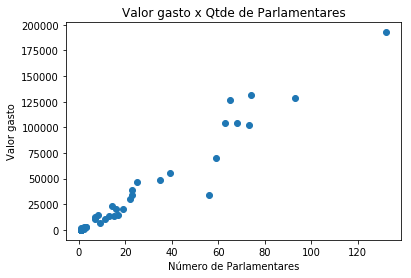

In [67]:
#resumopartido = dfpart.groupby(dfpart["sgpartido"]).sum()['vlrliquido']/1000
resumopartido_cont = dfpart.groupby(dfpart["sgpartido"]).txnomeparlamentar.nunique()

plt.scatter(resumopartido_cont, resumopartido)
plt.xlabel('Número de Parlamentares')
plt.ylabel('Valor gasto')
plt.title('Valor gasto x Qtde de Parlamentares')
plt.show()


Observa-se, pelo gráfico acima, que "naturalmente" a medida que aumenta a quantidade de parlamentares o gasto aumenta, porém tem-se um caso específico de alta discrepância quando é observado a quantidade em torno de 60 parlamentares. Nesse ponto o gasto varia entre 25 milhões até 125 milhões, aproximadamente. <br />
<br />
Uma análise interessante é observar se a emissão de bilhetes aéreos é feita para o parlamentar ou não. Neste caso, do total 16% dos bilhetes não são para o parlamentar. Porém, temos alguns partidos que merecem uma atenção especial e uma análise mais crítica (tabela abaixo): PEN, PRP, SOLIDARIEDADE, PODE\*, PTdoB, PMN, PPL, PV e PSOL.<br />
\*Está no top 15 de maiores gastos.<br />

Quando analisa-se os top 15 parlamentares, tem-se 9 com mais de 20% de bilhetes não emitidos para eles próprios: BONIFÁCIO DE ANDRADA\*, CARLOS SAMPAIO, MARCO MAIA, MARINALDO ROSENDO\*, MARINHA RAUPP, ONYX LORENZONI, PAULO FREIRE COSTA\*, PAULO PEREIRA DA SILVA\* e WLADIMIR COSTA.<br />
\*Mais de 50% de bilhetes não emitidos para eles próprios.

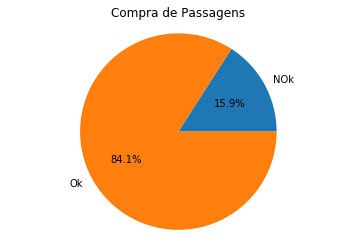

In [87]:
import warnings
warnings.filterwarnings('ignore')

dfpart_aereas['verif'] = 0
dfpart_aereas['verif'] = dfpart_aereas["txnomeparlamentar"] == dfpart_aereas["txtpassageiro"]
resumovoo = dfpart_aereas.groupby(dfpart_aereas["verif"]).txnomeparlamentar.count()
plt.pie(resumovoo.values, labels=['NOk', 'Ok'], autopct='%1.1f%%')
plt.title('Compra de Passagens')
plt.axis('equal')
plt.show()

In [109]:
dfpart_aereas['verif'] = dfpart_aereas["txnomeparlamentar"] == dfpart_aereas["txtpassageiro"]
tabela = pd.pivot_table(data=dfpart_aereas, values='vlrliquido', index='sgpartido', columns='verif', aggfunc='count', margins=True, 
                       dropna=True, fill_value=0)

In [130]:
tabela2 = tabela.div(tabela.iloc[:,-1], axis=0)*100
tabela2

verif,False,True,All
sgpartido,,,
AVANTE,10.586481,89.413519,100.0
DEM,18.857613,81.142387,100.0
MDB,16.159990,83.840010,100.0
PATRI,17.244413,82.755587,100.0
PCdoB,16.656779,83.343221,100.0
PDT,10.860187,89.139813,100.0
PEN,37.019231,62.980769,100.0
PHS,6.458512,93.541488,100.0
PMDB,18.103293,81.896707,100.0


In [136]:
dfpart_aereas['verif'] = dfpart_aereas["txnomeparlamentar"] == dfpart_aereas["txtpassageiro"]
tabela = pd.pivot_table(data=dfpart_aereas, values='vlrliquido', index='txnomeparlamentar', columns='verif', aggfunc='count', margins=True, 
                       dropna=True, fill_value=0)
tabela2 = tabela.div(tabela.iloc[:,-1], axis=0)*100
tabela2.query('txnomeparlamentar == ["WLADIMIR COSTA", "ONYX LORENZONI", "PAULO PEREIRA DA SILVA","ALFREDO KAEFER","CARLOS SAMPAIO","PAULO FREIRE COSTA","ALEX CANZIANI","MARINALDO ROSENDO", "MIRO TEIXEIRA","WALDIR MARANHÃO","MARINHA RAUPP","EDIO LOPES","ZÉ GERALDO","BONIFÁCIO DE ANDRADA","MARCO MAIA"]')

verif,False,True,All
txnomeparlamentar,,,
ALEX CANZIANI,16.168478,83.831522,100.0
ALFREDO KAEFER,12.642741,87.357259,100.0
BONIFÁCIO DE ANDRADA,50.884354,49.115646,100.0
CARLOS SAMPAIO,44.436005,55.563995,100.0
EDIO LOPES,12.788963,87.211037,100.0
MARCO MAIA,32.018717,67.981283,100.0
MARINALDO ROSENDO,54.787073,45.212927,100.0
MARINHA RAUPP,20.583832,79.416168,100.0
MIRO TEIXEIRA,0.000000,100.000000,100.0


Agora, pode ser feita uma projeção de gastos para 2019 com o histórico da base de dados.

In [333]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
valorliq = resumomes[:85] #expurgando o valor de fev/19 pois o valor está muito discrepante dos demais não indicando um valor real
#dividindo os dados
gastos = valorliq[:int(0.7*(len(valorliq)))]
valid = valorliq[int(0.7*(len(valorliq))):]

In [334]:
fit1 = ExponentialSmoothing(gastos,seasonal_periods=12, trend='add', seasonal='add',).fit(use_boxcox = True)
fit2 = ExponentialSmoothing(gastos,seasonal_periods=12, trend='add', seasonal='mul',).fit(use_boxcox = True)
fit3 = ExponentialSmoothing(gastos,seasonal_periods=12, trend='add', seasonal='add', damped = True).fit(use_boxcox = True)
fit4 = ExponentialSmoothing(gastos,seasonal_periods=12, trend='add', seasonal='mul', damped = True).fit(use_boxcox = True)

from math import sqrt
from sklearn.metrics import mean_squared_error

forecast_fit1 = fit1.forecast(len(valid))
forecast_fit2 = fit2.forecast(len(valid))
forecast_fit3 = fit3.forecast(len(valid))
forecast_fit4 = fit4.forecast(len(valid))

rms = [sqrt(mean_squared_error(valid,forecast_fit1)),sqrt(mean_squared_error(valid,forecast_fit2)),sqrt(mean_squared_error(valid,forecast_fit3)),sqrt(mean_squared_error(valid,forecast_fit4))]
print(rms)

[3881.937980593918, 4264.658490111006, 2631.557898639937, 2765.661766890559]


In [336]:
#Modelo 3 mais adequado com menor EQM, realizando o ajuste para toda a base
fit3 = ExponentialSmoothing(valorliq,seasonal_periods=12, trend='add', seasonal='add', damped = True).fit(use_boxcox = True)
forecast_fit3 = fit3.forecast(11) #projeção de gasto para 2019

Se for mantida o mesmo perfil de gasto mensal, em 2019 será desembolsado 185 milhões de reais.

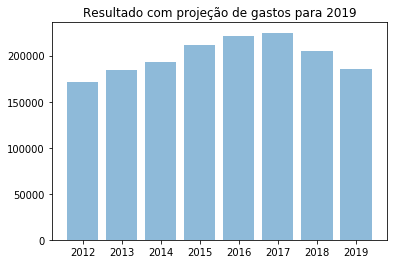

datemissao
2019    184952.960734
Name: vlrliquido, dtype: float64


In [351]:
resumoano[7:] = resumoano[7:]+sum(forecast_fit3)
ano = ("2012","2013","2014","2015","2016","2017","2018","2019")
y_pos2 = np.arange(len(ano))
plt.bar(ano, resumoano, align="center", alpha = .5)
plt.xticks(y_pos2, ano)
plt.title('Resultado com projeção de gastos para 2019')
plt.show()
print(resumoano[7:])